# Reinforced Anytime Bottom Up Rule Learning for Knowledge Graph Completion

## 2 Bottom Up Rule Learning

Trước tiên, chúng tôi giới thiệu loại quy tắc mà **AnyBURL** có thể học được trước khi chúng tôi mô tả cách chúng tôi tạo các quy tắc này từ các đường dẫn lấy mẫu. Các phần của điều này đã được trình bày dưới dạng khác trong [16]. Sau đó, chúng tôi giải thích khái niệm **Object Identity** (Nhận dạng đối tượng) đã được giới thiệu trong [25] và tranh luận lý do tại sao nó quan trọng đối với trường hợp sử dụng của chúng tôi. **Object Identity** đã được triển khai một phần trong phiên bản trước của **AnyBURL** mà không hiểu tầm quan trọng của nó.

### 2.1 Language Bias

Chúng tôi phân biệt dưới đây giữa ba loại quy tắc mà chúng tôi gọi là:
* ***binary rules*** $B$ quy tắc nhị phân
* quy tắc đơn nguyên kết thúc bằng một **dangling atom** nguyên tử lơ lửng $U_d$
* quy tắc đơn nguyên kết thúc bằng một **atom** (nguyên tử) bao gồm hằng số $U_c$

$$
\begin{matrix}
  B & ~ & h(A_0,A_n) \gets 	\bigwedge^n_{i=1} b_i(A_{i-1}, A_i) \\
  U_d & ~ & h(A_0,c) \gets  \bigwedge^n_{i=1} b_i(A_{i-1}, A_i) \\
  U_c & ~ & h(A_0,c) \gets  \bigwedge^{n-1}_{i=1} b_i(A_{i-1}, A_i) \wedge b_n(A_{n-1}, c^{\prime})
 \end{matrix}
 $$

Trái ngược với quy tắc nhị phân, **head atom**(nguyên tử đầu) trong quy tắc đơn nguyên chứa một hằng số và chỉ một thay vì hai biến. Một biểu thức như vậy cũng có thể được hiểu là một cách phức tạp để viết ra một vị ngữ đơn nguyên, đó là lý do để đặt tên cho các quy tắc này quy tắc đơn nguyên. Ví dụ điển hình là các nguyên tử đầu như *gender(X, female)*  hoặc *citizen(X,spain)*.

Chúng tôi gọi các quy tắc của các loại này là **path rules**(quy tắc đường dẫn), bởi vì các ***body atoms*** (phần  sau đấu $\gets$) tạo thành một đường dẫn **path**. Lưu ý rằng xu hướng ngôn ngữ của chúng tôi cũng bao gồm các biến thể quy tắc với các biến được đảo ngược trong các nguyên tử: được đưa ra đồ thị tri thức $G$, đường dẫn có độ dài $n$ là một chuỗi gồm ba bộ ba $p_i (c_i, c_i + 1)$ với $pi (c_i, c_i + 1) \in G$ hoặc $p_i (c_i + 1, c_i) \in G$ với $0 \geq i \leq n$. Các ***abstract rule patterns*** (mẫu quy tắc trừu tượng) được hiển thị ở trên được cho là có độ dài $n$ vì ***body atoms*** của chúng có thể được khởi tạo thành một đường dẫn có độ dài $n$. Thay vì $A_i$ đôi khi chúng ta sẽ sử dụng $A, B, C, \dots$ làm tên cho các biến. Hơn nữa, chúng ta thường sẽ thay thế các biến xuất hiện trong đầu bằng $X$ cho chủ thể và $Y$ cho đối tượng.

Quy tắc $B$ và quy tắc $U_c$ cũng được gọi là quy tắc kết nối kín. Chúng có thể được học bởi hệ thống khai thác AMIE được mô tả trong [11, 10]. Quy tắc $U_d$ không được đóng vì $A_n$ là biến chỉ xuất hiện một lần.

Ví dụ cho quy tắc nhị phân là Quy tắc (1) và (2) được hiển thị bên dưới. Họ mô tả mối quan hệ giữa $X$ và $Y$ thông qua một đường dẫn khác giữa $X$ và $Y$. Đường dẫn này có thể chứa một mối quan hệ duy nhất hoặc một chuỗi các mối quan hệ. Chúng tôi cho phép các quy tắc đệ quy, tức là, mối quan hệ trong **head** có thể xuất hiện một hoặc nhiều lần trong **body** như trong Quy tắc (2).

Quy tắc (3) là quy tắc $U_c$ quy định rằng một người là nữ, nếu cô ấy kết hôn với một người là nam.

Một ví dụ điển hình cho quy tắc $U_d$ là Quy tắc (4), trong đó nói rằng một diễn viên là điễn viên phim hành động người hành động (trong phim).

$$
\begin{matrix}
\textit{hypernym}(X, Y ) \gets \textit{hyponym}(Y, X) & \quad (1) \\
prod(X, Y ) \gets prod(X, A),sequel(A, Y )  & \quad  (2) \\
gen(X, female) \gets married(X, A), gen(A, male)  & \quad  (3) \\
prof(X, actor) \gets actedin(X, A)  & \quad (4)
\end{matrix}
$$

Tất cả các quy tắc được xem xét là xác suất có nghĩa là chúng được chú thích với điểm tin cậy thể hiện xác suất dự đoán một thực tế chính xác với quy tắc này. Tỷ lệ ***body groundings*** dẫn đến nối **head grounding** chính xác (được đo trên dữ liệu huấn luyện) được gọi là độ tin cậy của quy tắc. Điều quan trọng là phải hiểu mối quan hệ giữa ba loại quy tắc. Nó đặc biệt thú vị trong bối cảnh của các quy tắc xác suất. Với mục đích đó, hãy xem xét bộ quy tắc sau (điểm tin cậy giả tưởng được thêm vào dấu ngoặc vuông).

$$
\begin{matrix}
    speaks(X, Y ) \gets lives(X, A), lang(Y, A) & [0.8]  & \quad (5) \\
    speaks(X, english) \gets lives(X, A)        & [0.62] & \quad (6) \\
    speaks(X, french) \gets lives(X, france)    & [0.88] & \quad (7) \\
    speaks(X, german) \gets lives(X, germany)   & [0.95] & \quad (8) \\
\end{matrix}
$$

Xem xét quan hệ $lives(A, B)$ được sử dụng để nói rằng một người $A$ sống ở quốc gia $B$ và $lang(A, B)$ được sử dụng để nói rằng $A$ là (một trong) ngôn ngữ chính thức của $B$. Do đó, Quy tắc $B(5)$ nói rằng $X$ nói một ngôn ngữ $Y$ nhất định, nếu $X$ sống ở một quốc gia $A$ trong đó $Y$ là ngôn ngữ chính thức.

$U_d$ $Rule (6)$ là một *specialization* (chuyên môn hóa) để dự đoán người nói tiếng Anh

và các quy tắc $U_c$ còn lại liên quan đến một ngôn ngữ cụ thể đến một quốc gia cụ thể. 

Khía cạnh thú vị của bộ quy tắc này là thực tế rằng Quy tắc (6) có thể được tạo ra từ Quy tắc (5) bằng cách loại bỏ **Atom** thứ hai trong **body** và bằng cách thay $Y$ vào $head$.


Tương tự, Quy tắc (7) và (8) có thể được xây dựng bằng cách thay hằng bằng $A$. Có vẻ như chúng ta không cần các biến thể quy tắc chuyên biệt này, nếu chúng ta đã có quy tắc chung hơn. Tuy nhiên, điều này là sai vì hai lý do: 
* (i) có thể là trường hợp đồ thị tri thức đã cho không chứa thông tin về các ngôn ngữ chính thức của **Pháp** hoặc **Đức**; 
* và (ii) các confidences-(độ tinh cậy) của các quy tắc cụ thể (6) - (8) khác với độ tinh cậy của các quy tắc chung hơn. Độ tin cậy của một quy tắc chung có liên quan chặt chẽ với mức trung bình (có trọng số) so với confidences-(độ tinh cậy) cụ thể (ví dụ: bằng cách tổng hợp trên tất cả các quốc gia và ngôn ngữ). Vì lý do đó, cần phải tạo cả hai loại quy tắc, mặc dù chúng có thể mang thông tin dư thừa một phần.

## 2.2 Sampling Rules

Chúng tôi đề xuất một cách **bottom-up approach** (tiếp cận từ dưới lên) để học các quy tắc từ các **bottom rules** (quy tắc dưới cùng), tức là các quy tắc có căn cứ từ các **paths** (đường dẫn) được lấy mẫu trong đồ thị tri thức. Nó được chia thành các bước sau:

1.  Lấy mẫu một đường dẫn từ một đồ thị kiến thức nhất định. 
2.  Xây dựng **bottom rule** từ đường dẫn được lấy mẫu. 
3.  Xây dựng một *generalization lattice* (mạng tổng quát) bắt nguồn từ quy tắc dưới cùng. 
4.  Lưu trữ tất cả các quy tắc hữu ích xuất hiện trong mạng.

Bản phác thảo ở trên về cách tiếp cận của chúng tôi nhắc nhở thuật toán được triển khai trong [Aleph 26]. Tuy nhiên, **Aleph** sử dụng *bottom rule* để xác định ranh giới của *top-down search*. Nó bắt đầu với *general rule* (quy tắc chung nhất) và sử dụng các **atoms** (nguyên tử) xuất hiện trong **bottom rule** để tạo ra một **specialization lattice** (mạng tinh thể hóa). Tương tự, **AMIE** cũng thực hiện * top-down search* (tìm kiếm từ trên xuống), trái ngược với **Aleph** là hoàn thành vì nó không giới hạn *atoms** (các nguyên tử) nào được sử dụng để chuyên môn hóa một quy tắc. Cách tiếp cận của chúng tôi khác về cơ bản với cả hai thuật toán bởi vì chúng tôi tạo ra một mạng tổng quát bắt đầu từ **bottom rule** (quy tắc dưới cùng). Chúng tôi lập luận sau đây rằng tất cả các quy tắc có liên quan trong mạng tổng quát hóa khởi tạo một trong các loại quy tắc được xác định trong phần trước. Dựa trên cái nhìn sâu sắc này, chúng ta có thể khởi tạo trực tiếp các loại quy tắc này mà không cần phải tạo mạng hoàn chỉnh.

Để tìm các quy tắc cho một mối quan hệ cố định, AnykinaL lấy mẫu nhiều lần của mối quan hệ đó từ tập huấn luyện và mỗi lần tạo ra các quy tắc từ nó. Hình 1 cho thấy một tập hợp con nhỏ của biểu đồ tri thức G. Chúng tôi sử dụng nó để chứng minh các quy tắc cho mối quan hệ sẽ được học từ nó như thế nào. Chúng tôi xây dựng các quy tắc dưới cùng của chiều dài n, bắt đầu từ speaks (ed, d) (Ed nói tiếng Hà Lan), sẽ là người đứng đầu các quy tắc. Để làm điều này, chúng tôi ngẫu nhiên đi bộ n bước trong biểu đồ, bắt đầu từ ed hoặc d. Cùng với bộ ba đầu, kết quả là một đường dẫn có độ dài n + 1. Chúng tôi đã đánh dấu ba đường dẫn trong Hình 1 có thể được tìm thấy cho n = 2 hoặc n = 1, tương ứng. Các đường dẫn màu xanh lá cây và màu xanh là theo chu kỳ, trong khi đường dẫn màu đỏ, bao gồm nói (ed, d), là theo chu kỳ. Chúng tôi chuyển đổi các đường dẫn này thành các quy tắc dưới cùng (9), (10) và (11).

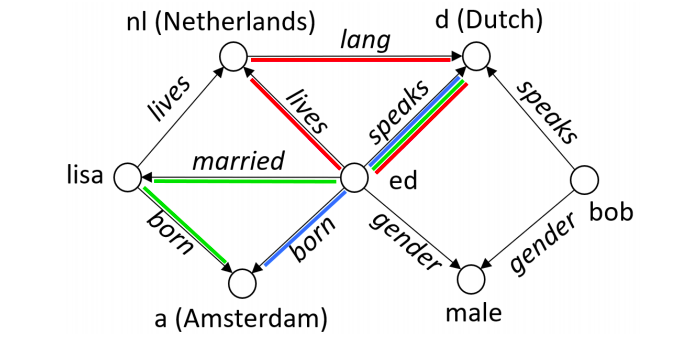

In [2]:
from IPython.display import Image
Image(filename='../../images/R-AnyBURL-fig1.png')

Hình 1: Một đồ thị tri thức $G$ được sử dụng cho các *sampling paths*. Chúng tôi đã đánh dấu đường dẫn tương ứng với Quy tắc 9 màu xanh lam, Quy tắc 10 màu xanh lá cây và Quy tắc 11 màu đỏ.